In [56]:
import pandas as pd
import numpy as np
import sklearn 
import plotly.express as px

np.random.seed(42)

# 1. Get the Data
___

In [57]:
df = pd.read_csv("diabetes.csv")

## Take a quick look at the structure

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898bdbbb20>,
      dtype=object)

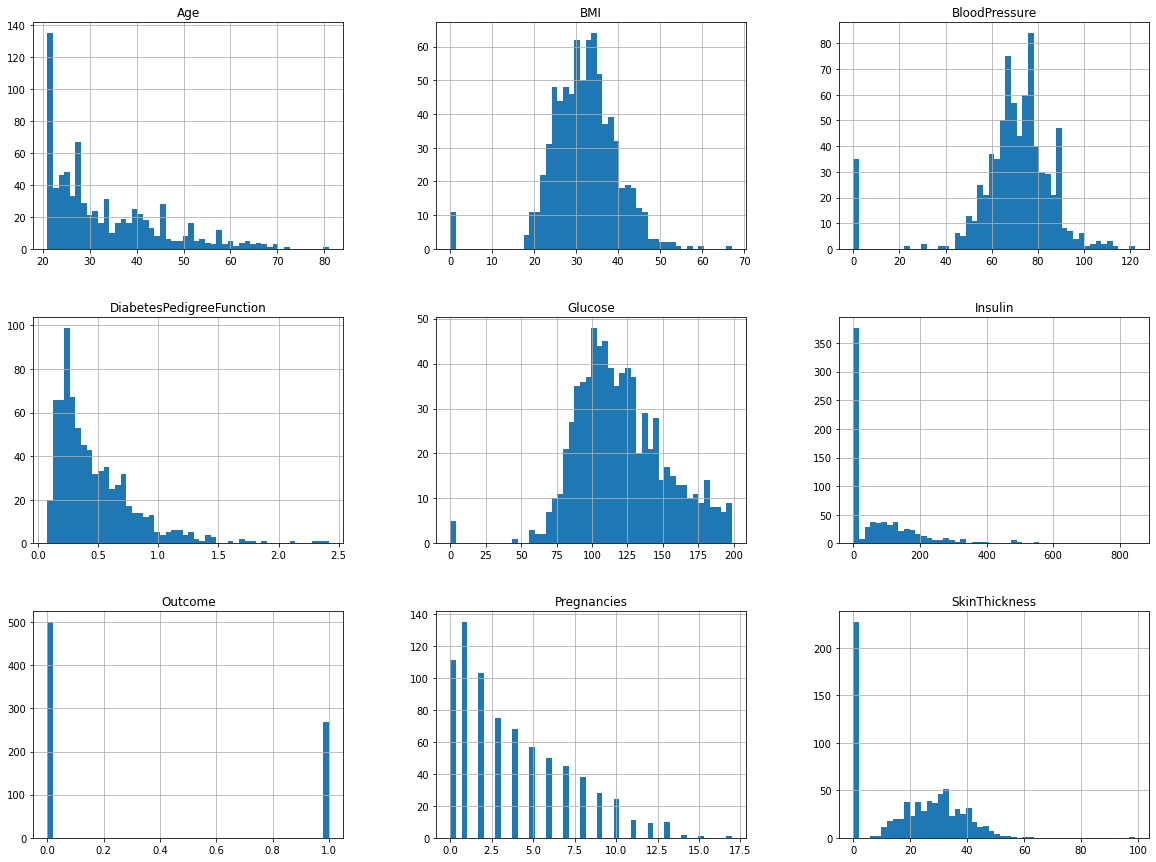

In [61]:
df.hist(bins=50, figsize=(20,15))

## Create a Test Set

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [63]:
train_set.shape

(614, 9)

In [64]:
test_set.shape

(154, 9)

# 2. Explore the data
---

In [65]:
diabetes = train_set.copy()

## Study each attribute and its characteristics 

- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, logarithmic, etc)
- Possibly usefull for the task?
- Type of distribution (Gaussian, uniform, logarithmic, etc)


### Features
- __Pregnancies__, categorical data with 17 stages. What this stages means?
- __Glucose__, Plasma glucose concentration a 2 hours in an oral glucose tolerance test, integer range between 0 to 199, normal distribution with possible outliers in 0
- __BloodPresure__, diastolic blood pressure integers between 0 to 122 (mm Hg) normal distribution with possible outliers in 0 
- __SkinThickness__, integer between 0 to 63 mm, normal distribution with possible outliers in 0
- __Insulin__, 2-Hour serum insulin integer between 0 to 846 mu U/ml, with possible outliers in 0
- __BMI__, Body mass index, floats between0 to 97 $(kg/m^2)$ (possible outliers in 0), normal distribution with possible outliers in 0
    - BMI < 18.5, underweight
    - 18.5 < BMI <25, normal
    - 25.0 < BMI <30, overweight
    - BMI >30.0, obese
- __Age__, integers between 21 to 81 logarithmic distribution
- __DiabetesPedigreeFunction__, a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history, float between 0.08 to 2.42

### Target
- __Outcome__, boolean with 0 means no diabete, 1 diabete --> 34% diabetes in this sample 

  
### ⚠️ No missing values, but some value are set to 0 and look weird 




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898a338bb0>,
      dtype=object)

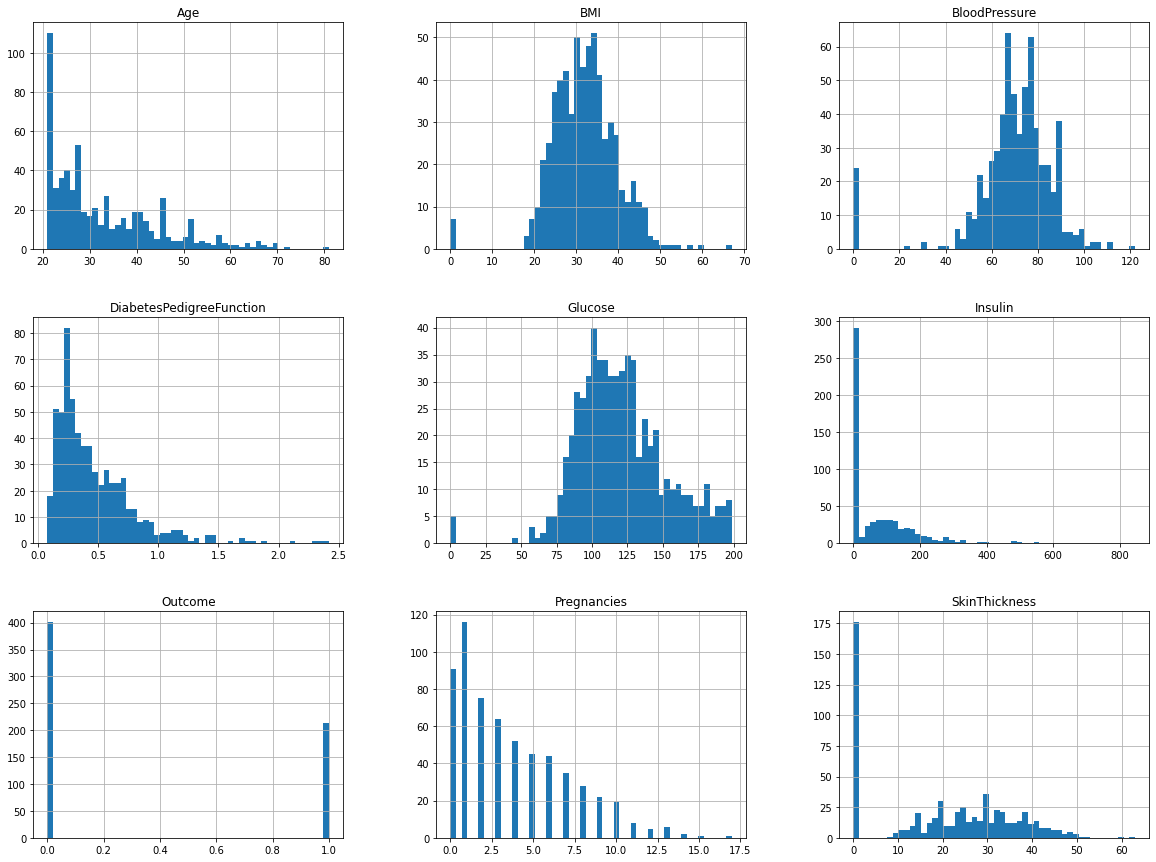

In [66]:
diabetes.hist(bins=50, figsize=(20,15))

weird values in 0 for skinthickness, glucose, bloodPressure, age insulin seems to be outliers. Let's investigate

In [67]:
diabetes[diabetes['BloodPressure'] == 0][:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
535,4,132,0,0,0,32.9,0.302,23,1
357,13,129,0,30,0,39.9,0.569,44,1
703,2,129,0,0,0,38.5,0.304,41,0
619,0,119,0,0,0,32.4,0.141,24,1


### What is Diabetes?
__Diabetes__ is a disease that occurs when your __blood glucose__, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. __Insulin__, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

### Blood pressure, skin thickness, BMI  can't be 0 

### Can glucose level be zero?
Our body works normal and likes to maintain a blood glucose level of around 70–120 mg/dl. This range of blood glucose level is also called sweet spot. If the glucose level in the body reduces below 60mg/dl, the human can go unconscious. This state is called diabetic coma. Meaning coma caused by too less glucose level. This condition is considered to be serious. If the medical help is provided in time, the health is restored. If the glucose level falls below 40 mg/dl, even the brain may stop working. The health can not be restored.
__glucose can't not be 0__

### Can insulin level be zero?
So a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn't go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes.

### A lot of outliers for `SkinThickness`

In [68]:
(diabetes['SkinThickness'] == 0).value_counts()

False    438
True     176
Name: SkinThickness, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898a3380a0>,
      dtype=object)

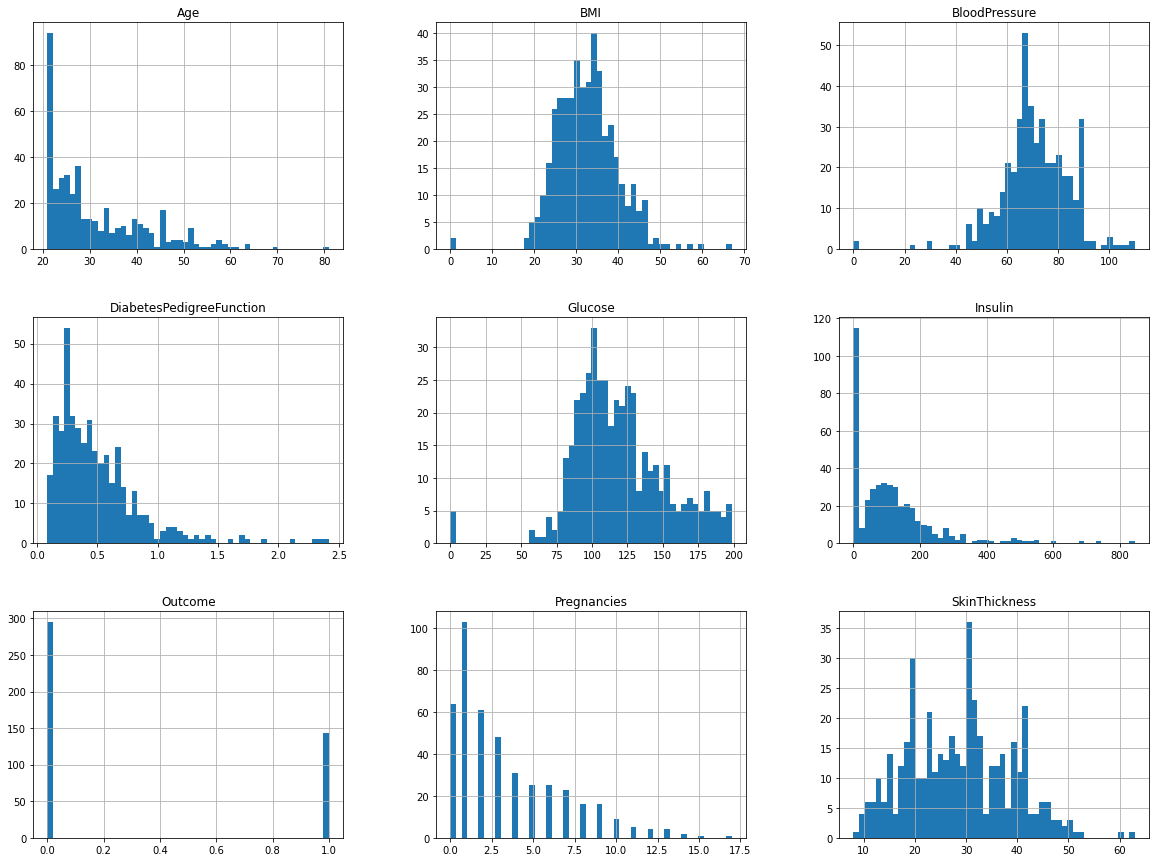

In [69]:
diabetes[diabetes['SkinThickness'] != 0].hist(bins=50, figsize=(20,15))

## Visualize the data to Gain Insights 

In [70]:
import plotly.express as px

In [71]:
px.scatter(diabetes, x='Glucose', y='BMI', color='Outcome')

- __Glucose__ seems to be the most important parameters 
- People with a low __BMI__, under 23 is not touch by the disease

## Looking for Correlation

In [72]:
corr_matrix = diabetes.corr()

In [73]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.456117
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Name: Outcome, dtype: float64

<div class="alert alert-block alert-info">
<b>Interpretation</b>
    <ul>
        <li>best attributes, Glucose, BMI and Age</li>
        <li>we may delete the skin thickness atributes because it's not realy correlated and we have a lot of missing values</li>
    </ul>
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898ebde190>,
      dtype=object)

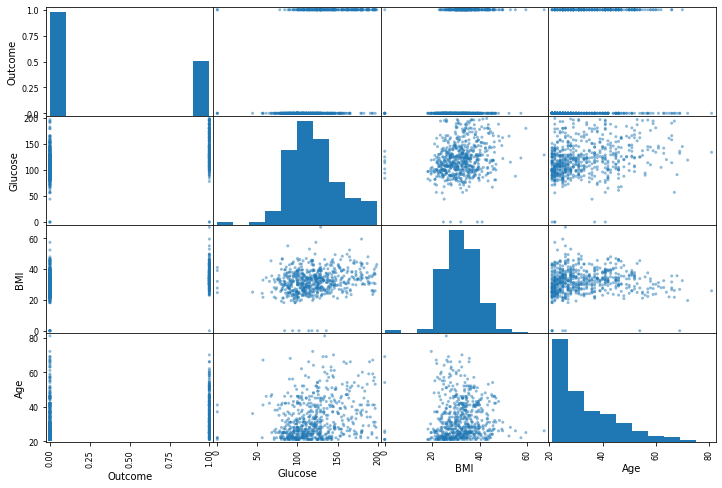

In [74]:
from pandas.plotting import scatter_matrix
attributes = ['Outcome', 'Glucose', 'BMI', 'Age']
scatter_matrix(diabetes[attributes], figsize=(12,8))

In [75]:
px.scatter(diabetes, x='Glucose', y='Outcome', opacity=0.5)

↳ hight correlation with glucosse in the blood

## Experimenting with attribute combination

In [76]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.456117
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Name: Outcome, dtype: float64

### Features aggregation

In [77]:
diabetes['Glucose_per_BMI'] = diabetes['Glucose'] / diabetes['BMI']
diabetes['Insulin_per_Glucose'] = diabetes['Insulin'] / diabetes['Glucose']

    1. underweight → BMI < 18.5      
    2. normal      → 18.5 < BMI < 25
    3. overweight  → 25.0 < BMI < 30
    4. obese       → BMI > 30.0

### Discretization

In [78]:
# discrete BMI
bins = [-1,18.5,25,30, np.inf]
cats = pd.cut(diabetes['BMI'], bins)
diabetes['cats_BMI'] = cats.values.codes

In [79]:
corr_matrix = diabetes.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.456117
cats_BMI                    0.318542
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
Glucose_per_BMI             0.157617
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Insulin_per_Glucose         0.038298
Name: Outcome, dtype: float64

↳ __Transforming BMI in cats augment is correlation with the target__. The 2 features aggregation are not really relevant 

# 3. Prepare the Data 
---

In [80]:
X = train_set.drop("Outcome", axis=1)
y = train_set["Outcome"]

## Data cleaning


- [x] fill the missing values, __no missing values__
- [x] Vategorical data → numerical, __only numerical data__ 
- [ ] outliers


### Remove outliers
Need to remove the instance where `Glucose`, `BloodPressure` and `BMI` are still equal to 0

In [81]:
outliers_columns = ['BloodPressure', 'BMI', 'Glucose']
non_zero_mask = ~(X[outliers_columns] == 0).any(1)
X = X[non_zero_mask]
y = y[non_zero_mask]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898dcf5ac0>,
      dtype=object)

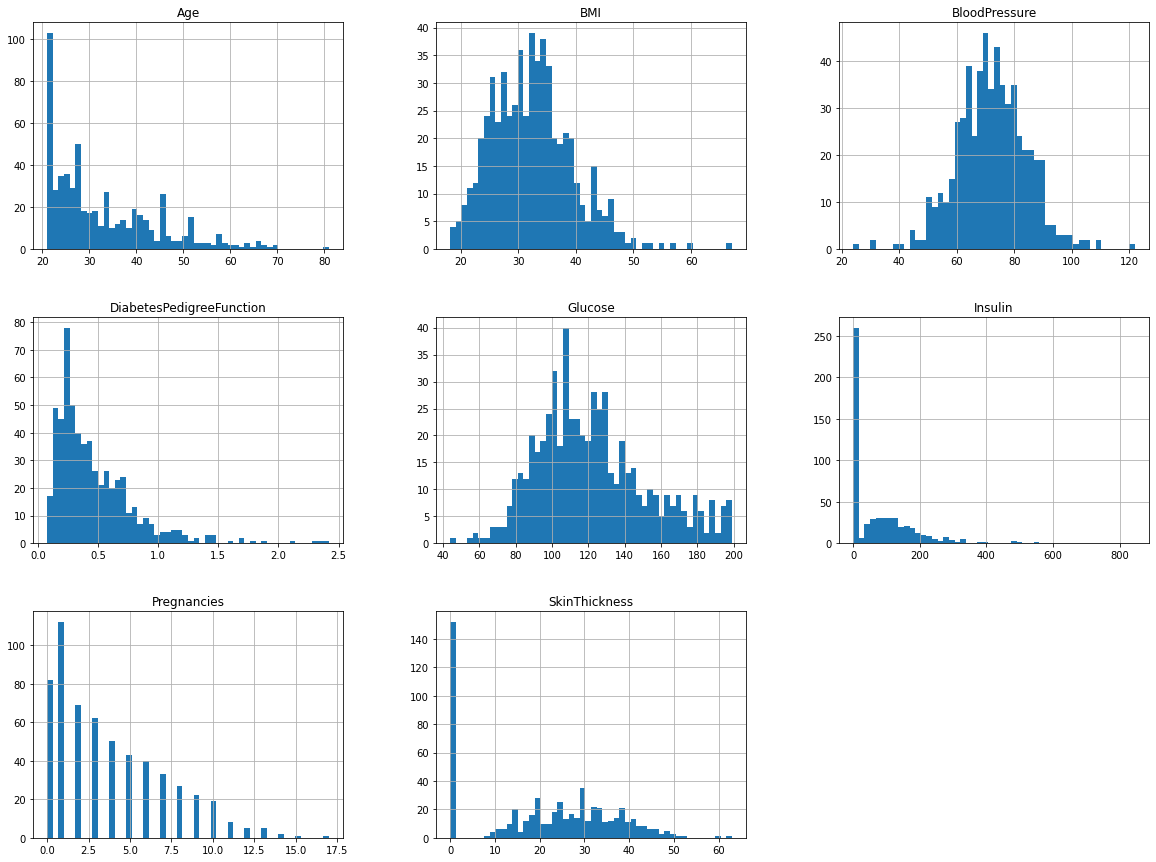

In [171]:
X.hist(bins=50, figsize=(20,15))

🥳 Look's much better ! However lot's of Insulin is equal to 0. Is it normal for diabetes people ?
- [x] outliers



## Custom transformer
↳ embed data cleaning step in sklearn function

In [172]:
from sklearn.preprocessing import FunctionTransformer

1. __Get rid of the attributes SkinThcikness__
<p>↳ A lot of outliers and not to much correlation between this attributes and the targets 

In [84]:
def feature_select(df, drop_col=['SkinThickness'], action=True):
    if action:
        return df.drop(drop_col, axis=1, errors='ignore')
    else:
        return df

# test
select_features = FunctionTransformer(feature_select, kw_args={"action": True})
# select_features.transform(X)

2. __Discretize BMI__

In [85]:
bins = [-1,18.5,25,30, np.inf]

def disc_bmi(df, buckets=bins, discretize=True):
    if discretize:
        cats = pd.cut(df['BMI'], bins)
        df['BMI'] = cats.values.codes
        return df
    else:
        return df  

# test
discrete_BMI = FunctionTransformer(disc_bmi, kw_args={"discretize": True})
# discrete_BMI.transform(X1)

## Transform Pipelines

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

pd.options.mode.chained_assignment = None  # default='warn'

### Pipeline process
1. Feature selection
2. discretize BMI
3. Standardization

In [87]:
pipeline = Pipeline([
    ('feature_select', FunctionTransformer(
        feature_select,
        kw_args={"action": True, "drop_col":["SkinThickness", "Pregnancies"]}
    )),
    ('discrete_BMI', FunctionTransformer(disc_bmi, kw_args={"discretize": True})),
    ('std_scaler', StandardScaler())
])

X_prepared = pipeline.fit_transform(X)

# 4. Short-List Promising Model
---

## Baseline model
↳ set all prediction to 0

In [131]:
X_predict_0 = np.array([0]*len(y))
baseline_score = accuracy_score(y, X_predict_0)
baseline_score

0.6557659208261618

## Train many quick and dirty model from different categories 

### Stochastic Gradient Descent

In [164]:
from sklearn.linear_model import SGDClassifier
np.random.seed(42)

SGD_clf = SGDClassifier()
SGD_clf.fit(X_prepared, y)

SGDClassifier()

In [165]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

scores = cross_val_score(SGD_clf, X_prepared, y, scoring="accuracy", cv=10)
scores

array([0.69491525, 0.74137931, 0.62068966, 0.75862069, 0.74137931,
       0.79310345, 0.77586207, 0.70689655, 0.82758621, 0.72413793])

In [168]:
def display_scores(scores):
    confidence_itv = [scores.mean() - 3 * scores.std(), scores.mean() + 3 * scores.std()]
    print(f"Scores :{scores}")
    print("")
    print(f"Mean: {scores.mean()}")
    print(f"95% intervals: {confidence_itv}")

In [169]:
display_scores(scores)

Scores :[0.69491525 0.74137931 0.62068966 0.75862069 0.74137931 0.79310345
 0.77586207 0.70689655 0.82758621 0.72413793]

Mean: 0.7384570426651081
95% intervals: [0.5749111629883904, 0.9020029223418259]
